In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# IF USING GOOGLE COLAB


# root_path = '/content/drive/MyDrive/Artificial Intelligence/'
# filename = 'new_security_fatigue_dataset.csv'
# path = os.path.join(root_path, filename)
# print(path)

In [3]:
path = r"C:\Users\Tuan Anh HSLU\OneDrive - Hochschule Luzern\Desktop\HSLU22\Bachelor Thesis\ML Models\new_security_fatigue_dataset.csv"

In [4]:
data = pd.read_csv(path)
df = pd.DataFrame(data)

In [5]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Which types of MFA do you encounter most often? (Select all that apply),Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,Which types of security warnings do you encounter most often? (Select all that apply),Difficulty Level Security Warnings,Effort Required Security Warnings,Perceived Importance of Security Warnings
0,Intermediate,Monthly,Difficult (Password complexity makes it frustr...,"High effort (I frequently change passwords, an...",Very important (I prioritize password security...,Monthly,"Authentication app (e.g., Google Authenticator...",Very easy (MFA is effortless),No effort (MFA is seamless and quick),Very important (I fully support MFA and always...,Quarterly,Unauthorized Access Attempts; Antivirus/Malwar...,Moderate (Some security warnings are complex),High effort (I frequently deal with security a...,Important (I take security warnings seriously)
1,Intermediate,Quarterly,Moderate (Some passwords are difficult to reme...,"Little effort (I rarely change passwords, and ...",Important (I follow password policies carefully),Weekly,Security key or hardware token; Biometric veri...,Moderate (Sometimes I have trouble with MFA co...,Little effort (MFA is slightly inconvenient),Moderately important (MFA is useful but someti...,Daily,I do not encounter any warnings/notifications,Difficult (I struggle to interpret or follow s...,No effort (Security warnings are automated and...,Very important (Security warnings are essentia...
2,Beginner (No prior knowledge),Annually,Easy (Password rules are simple),"High effort (I frequently change passwords, an...","Slightly important (I recognize the need, but ...",Quarterly,"Authentication app (e.g., Google Authenticator...",Very easy (MFA is effortless),Little effort (MFA is slightly inconvenient),Slightly important (I recognize MFA’s value bu...,Monthly,I do not encounter any warnings/notifications,Difficult (I struggle to interpret or follow s...,No effort (Security warnings are automated and...,Slightly important (I recognize their value bu...
3,Advanced (Expert in cybersecurity),Daily,Moderate (Some passwords are difficult to reme...,"Little effort (I rarely change passwords, and ...",Important (I follow password policies carefully),Quarterly,I do not use MFA,Difficult (I often struggle with MFA authentic...,Little effort (MFA is slightly inconvenient),Slightly important (I recognize MFA’s value bu...,Quarterly,Antivirus/Malware Notifications; System Update...,"Easy (Warnings are understandable, but some re...",High effort (I frequently deal with security a...,Very important (Security warnings are essentia...
4,Beginner (No prior knowledge),Quarterly,Very easy (I have no trouble managing passwords),"High effort (I frequently change passwords, an...","Slightly important (I recognize the need, but ...",Daily,I do not use MFA,Easy (MFA is simple to complete),Moderate effort (MFA occasionally disrupts work),Important (MFA is a critical security feature),Monthly,System Update Alerts; Phishing Warnings; Unaut...,Very easy (Security warnings are clear and eas...,No effort (Security warnings are automated and...,Not important (I ignore most security warnings)


In [6]:
#df = df.drop(columns= ['Id', 'Start time', 'Completion time', 'Email', 'Name', 'Language', 'What is your age?', 'Gender', 'Industry', 'How do you typically respond to frequent security warnings?', 'How much fatigue does this cause you?', 'How do you typically request access to restricted files, software, or systems?'])

In [7]:
#df.head(3)

In [8]:
"""

structured_df = df.rename(columns={
    'Level of familiarity with cybersecurity practices': 'Familiarity',
    'How often are you required to change your password?': 'Password Change Frequency',
    'How complex are your password requirements?': 'Password Complexity',
    'How much fatigue does password management cause you?': 'Password Fatigue',
    'How frequently do you encounter MFA prompts?': 'MFA Frequency',
    'Which MFA methods were used?': 'MFA Methods',
    'How much fatigue do you feel when dealing with MFA requirements?': 'MFA Fatigue',
    'How frequently do you encounter alerts/warnings?': 'Alert Frequency',
    'Which type of warnings/alerts did you encounter?': 'Alert Type',
    'How often do you encounter access restrictions when trying to open files, applications, or systems?': 'Access Restriction Frequency',
    'How do you typically request access to restricted files, software, or systems?': 'Access Request Method',
    'How much fatigue do you feel when dealing with access restrictions?': 'Access Fatigue',
    'How much fatigue does this cause you?': 'Overall Fatigue'
})

"""

"\n\nstructured_df = df.rename(columns={\n    'Level of familiarity with cybersecurity practices': 'Familiarity',\n    'How often are you required to change your password?': 'Password Change Frequency',\n    'How complex are your password requirements?': 'Password Complexity',\n    'How much fatigue does password management cause you?': 'Password Fatigue',\n    'How frequently do you encounter MFA prompts?': 'MFA Frequency',\n    'Which MFA methods were used?': 'MFA Methods',\n    'How much fatigue do you feel when dealing with MFA requirements?': 'MFA Fatigue',\n    'How frequently do you encounter alerts/warnings?': 'Alert Frequency',\n    'Which type of warnings/alerts did you encounter?': 'Alert Type',\n    'How often do you encounter access restrictions when trying to open files, applications, or systems?': 'Access Restriction Frequency',\n    'How do you typically request access to restricted files, software, or systems?': 'Access Request Method',\n    'How much fatigue do you fe

In [9]:
#structured_df.head()

In [10]:
# Define the columns that need one-hot encoding (splitting multiple entries into separate columns)
multi_select_columns = [
    "Which types of MFA do you encounter most often? (Select all that apply)",
    "Which types of security warnings do you encounter most often? (Select all that apply)"
]

# Apply one-hot encoding by splitting the values into separate binary columns
for column in multi_select_columns:
    if column in df.columns:
        df_expanded = df[column].str.get_dummies(sep='; ')
        df_expanded.columns = [f"{column}_{col}" for col in df_expanded.columns]
        df = pd.concat([df, df_expanded], axis=1)
        df.drop(column, axis=1, inplace=True)

In [11]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,"Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)","Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)",Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA,Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts
0,Intermediate,Monthly,Difficult (Password complexity makes it frustr...,"High effort (I frequently change passwords, an...",Very important (I prioritize password security...,Monthly,Very easy (MFA is effortless),No effort (MFA is seamless and quick),Very important (I fully support MFA and always...,Quarterly,...,1,0,0,0,1,1,0,1,0,1
1,Intermediate,Quarterly,Moderate (Some passwords are difficult to reme...,"Little effort (I rarely change passwords, and ...",Important (I follow password policies carefully),Weekly,Moderate (Sometimes I have trouble with MFA co...,Little effort (MFA is slightly inconvenient),Moderately important (MFA is useful but someti...,Daily,...,0,1,0,0,1,0,1,0,0,0
2,Beginner (No prior knowledge),Annually,Easy (Password rules are simple),"High effort (I frequently change passwords, an...","Slightly important (I recognize the need, but ...",Quarterly,Very easy (MFA is effortless),Little effort (MFA is slightly inconvenient),Slightly important (I recognize MFA’s value bu...,Monthly,...,1,1,0,0,0,0,1,0,0,0
3,Advanced (Expert in cybersecurity),Daily,Moderate (Some passwords are difficult to reme...,"Little effort (I rarely change passwords, and ...",Important (I follow password policies carefully),Quarterly,Difficult (I often struggle with MFA authentic...,Little effort (MFA is slightly inconvenient),Slightly important (I recognize MFA’s value bu...,Quarterly,...,0,0,1,0,0,1,0,0,1,0
4,Beginner (No prior knowledge),Quarterly,Very easy (I have no trouble managing passwords),"High effort (I frequently change passwords, an...","Slightly important (I recognize the need, but ...",Daily,Easy (MFA is simple to complete),Moderate effort (MFA occasionally disrupts work),Important (MFA is a critical security feature),Monthly,...,0,0,1,0,0,0,0,1,1,1


In [12]:
# Function to clean text (remove content inside parentheses)
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r"\s*\(.*?\)", "", text).strip()  # Remove text inside ( )
    return text

# Apply cleaning to all necessary columns before mapping
columns_to_clean = [
    "Difficulty Level", "Effort Required", "Perceived Importance",
    "Difficulty Level MFA", "Effort Required MFA", "Perceived Importance of MFA",
    "Difficulty Level Security Warnings", "Effort Required Security Warnings", "Perceived Importance of Security Warnings"
]

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)

In [13]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,"Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)","Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)",Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA,Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts
0,Intermediate,Monthly,Difficult,High effort,Very important,Monthly,Very easy,No effort,Very important,Quarterly,...,1,0,0,0,1,1,0,1,0,1
1,Intermediate,Quarterly,Moderate,Little effort,Important,Weekly,Moderate,Little effort,Moderately important,Daily,...,0,1,0,0,1,0,1,0,0,0
2,Beginner (No prior knowledge),Annually,Easy,High effort,Slightly important,Quarterly,Very easy,Little effort,Slightly important,Monthly,...,1,1,0,0,0,0,1,0,0,0
3,Advanced (Expert in cybersecurity),Daily,Moderate,Little effort,Important,Quarterly,Difficult,Little effort,Slightly important,Quarterly,...,0,0,1,0,0,1,0,0,1,0
4,Beginner (No prior knowledge),Quarterly,Very easy,High effort,Slightly important,Daily,Easy,Moderate effort,Important,Monthly,...,0,0,1,0,0,0,0,1,1,1


In [14]:
# Define the corrected mappings using only the cleaned text
difficulty_mapping = {
    "Very easy": 1,
    "Easy": 2,
    "Moderate": 3,
    "Difficult": 4,
    "Very difficult": 5
}

effort_mapping = {
    "No effort": 1,
    "Little effort": 2,
    "Moderate effort": 3,
    "High effort": 4,
    "Very high effort": 5
}

importance_mapping = {
    "Not important": 1,
    "Slightly important": 2,
    "Moderately important": 3,
    "Important": 4,
    "Very important": 5
}

# Apply mappings only to existing columns
columns_to_map = {
    "Level of familiarity with cybersecurity practices": {
        "Beginner (No prior knowledge)": 2,
        "Intermediate": 1,
        "Advanced (Expert in cybersecurity)": 0
    },
    "Frequency of Password Changes": {
        "Annually": 1, "Quarterly": 2, "Monthly": 3, "Weekly": 4, "Daily": 5
    },
    "Difficulty Level": difficulty_mapping,
    "Effort Required": effort_mapping,
    "Perceived Importance": importance_mapping,
    "Frequency of MFA prompts": {
        "Annually": 1, "Quarterly": 2, "Monthly": 3, "Weekly": 4, "Daily": 5
    },
    "Difficulty Level MFA": difficulty_mapping,
    "Effort Required MFA": effort_mapping,
    "Perceived Importance of MFA": importance_mapping,
    "Frequency of Security Warnings": {
        "Annually": 1, "Quarterly": 2, "Monthly": 3, "Weekly": 4, "Daily": 5
    },
    "Difficulty Level Security Warnings": difficulty_mapping,
    "Effort Required Security Warnings": effort_mapping,
    "Perceived Importance of Security Warnings": importance_mapping
}

# Apply mappings
for col, mapping in columns_to_map.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        df[col] = df[col].fillna(-1)  # Replace unmapped values with -1 for debugging

In [15]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,"Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)","Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)",Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA,Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts
0,1,3,4,4,5,3,1,1,5,2,...,1,0,0,0,1,1,0,1,0,1
1,1,2,3,2,4,4,3,2,3,5,...,0,1,0,0,1,0,1,0,0,0
2,2,1,2,4,2,2,1,2,2,3,...,1,1,0,0,0,0,1,0,0,0
3,0,5,3,2,4,2,4,2,2,2,...,0,0,1,0,0,1,0,0,1,0
4,2,2,1,4,2,5,2,3,4,3,...,0,0,1,0,0,0,0,1,1,1


In [16]:
# Define security measures that exist in the dataset
security_measures_existing = [
    ("Frequency of Password Changes", "Difficulty Level", "Effort Required", "Perceived Importance"),
    ("Frequency of MFA prompts", "Difficulty Level MFA", "Effort Required MFA", "Perceived Importance of MFA"),
    ("Frequency of Security Warnings", "Difficulty Level Security Warnings", "Effort Required Security Warnings", "Perceived Importance of Security Warnings"),
]

# Tunable parameter for familiarity adjustment
alpha_fam = 0.5  # You can change this value to control the weight of the familiarity adjustment

# Compute the fatigue score for each existing security measure with familiarity adjustment
for freq_col, diff_col, effort_col, imp_col in security_measures_existing:
    # Compute the unadjusted fatigue score for this measure
    unadjusted = (df[freq_col] * df[diff_col] * df[effort_col]) / df[imp_col]
    # Incorporate the familiarity adjustment:
    #  Level of familiarity is on a scale where 0 = Advanced, 2 = Beginner.
    df[f"Fatigue Score {freq_col}"] = unadjusted * (1 + alpha_fam * (df["Level of familiarity with cybersecurity practices"] / 2))

# Compute the average fatigue score across all security measures
fatigue_columns = [f"Fatigue Score {freq_col}" for freq_col, _, _, _ in security_measures_existing]
df["Average Fatigue Score"] = df[fatigue_columns].mean(axis=1)


In [17]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts,Fatigue Score Frequency of Password Changes,Fatigue Score Frequency of MFA prompts,Fatigue Score Frequency of Security Warnings,Average Fatigue Score
0,1,3,4,4,5,3,1,1,5,2,...,1,1,0,1,0,1,12.00,0.75,7.5,6.750000
1,1,2,3,2,4,4,3,2,3,5,...,1,0,1,0,0,0,3.75,10.00,5.0,6.250000
2,2,1,2,4,2,2,1,2,2,3,...,0,0,1,0,0,0,6.00,3.00,9.0,6.000000
3,0,5,3,2,4,2,4,2,2,2,...,0,1,0,0,1,0,7.50,8.00,3.2,6.233333
4,2,2,1,4,2,5,2,3,4,3,...,0,0,0,1,1,1,6.00,11.25,4.5,7.250000


In [18]:
df = df.drop(columns=["Fatigue Score Frequency of Password Changes", "Fatigue Score Frequency of MFA prompts", "Fatigue Score Frequency of Security Warnings"])

In [19]:
df.head(10)

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,"Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)",Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA,Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts,Average Fatigue Score
0,1,3,4,4,5,3,1,1,5,2,...,0,0,0,1,1,0,1,0,1,6.750000
1,1,2,3,2,4,4,3,2,3,5,...,1,0,0,1,0,1,0,0,0,6.250000
2,2,1,2,4,2,2,1,2,2,3,...,1,0,0,0,0,1,0,0,0,6.000000
3,0,5,3,2,4,2,4,2,2,2,...,0,1,0,0,1,0,0,1,0,6.233333
4,2,2,1,4,2,5,2,3,4,3,...,0,1,0,0,0,0,1,1,1,7.250000
5,0,2,4,2,1,4,4,5,5,2,...,0,0,1,1,1,0,0,1,0,14.666667
6,1,2,2,4,3,4,3,2,2,5,...,0,0,0,1,1,0,0,1,0,17.638889
7,1,2,1,4,5,1,2,3,5,5,...,1,0,0,1,1,0,1,0,1,5.854167
8,0,5,5,2,3,3,2,3,4,1,...,0,0,1,1,0,0,1,1,1,7.855556
9,0,4,3,4,5,3,3,2,5,1,...,0,0,1,0,1,0,0,1,0,4.622222


In [20]:
df.to_csv("preprocessed.csv", index=False)

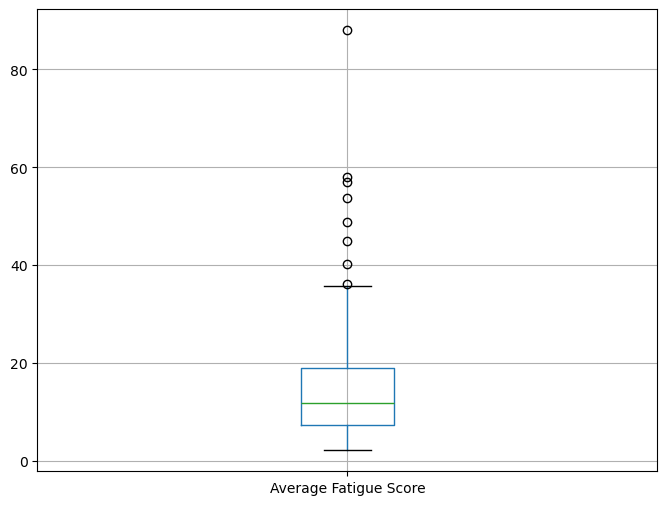

In [21]:
plt.figure(figsize=(8,6))
df.boxplot(column=['Average Fatigue Score'])

plt.show()

In [22]:
df.columns

Index(['Level of familiarity with cybersecurity practices',
       'Frequency of Password Changes', 'Difficulty Level', 'Effort Required',
       'Perceived Importance', 'Frequency of MFA prompts',
       'Difficulty Level MFA', 'Effort Required MFA',
       'Perceived Importance of MFA', 'Frequency of Security Warnings',
       'Difficulty Level Security Warnings',
       'Effort Required Security Warnings',
       'Perceived Importance of Security Warnings',
       'Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)',
       'Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)',
       'Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA',
       'Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email',
       'Which type

In [23]:
# Define weights for each one-hot column
weights = {
    # MFA
    "Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)": 2,
    "Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)": 3,
    "Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA": 0,
    "Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email": 2,
    "Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token": 4,

    # Security Warnings
    "Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications": 2,
    "Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications": 0,
    "Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings": 2,
    "Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts": 2,
    "Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts": 3
}

# Initialize the Security Score column to 0
df["Security Score"] = 0

# Calculate the weighted sum for each row
for col, weight in weights.items():
    # Add the product of presence * weight
    df["Security Score"] += df[col] * weight

print("Security Score calculation completed. Check 'Security Score' column.")

Security Score calculation completed. Check 'Security Score' column.


In [24]:
# Define features (X) and target (y)
X = df.drop(columns=["Average Fatigue Score", "Security Score"])  # Features (all columns except target)
y = df["Average Fatigue Score"]  # Target variable (without familiarity adjustment)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Absolute Error (MAE): 6.9164
R² Score: 0.3393


In [25]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_absolute_error, r2_score

# # Assuming df is your DataFrame and you've already computed "Average Fatigue Score" as the target.
# X = df.drop(columns=["Average Fatigue Score"])
# y = df["Average Fatigue Score"]

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a grid of hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize a Random Forest Regressor with a fixed random state for reproducibility
# rf = RandomForestRegressor(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='neg_mean_absolute_error',
#                            n_jobs=-1,
#                            verbose=2)

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Get the best estimator
# best_rf = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated MAE:", -grid_search.best_score_)

# # Evaluate the best model on the test set
# y_pred = best_rf.predict(X_test)
# test_mae = mean_absolute_error(y_test, y_pred)
# test_r2 = r2_score(y_test, y_pred)
# print("Test MAE:", test_mae)
# print("Test R² Score:", test_r2)


In [26]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_absolute_error, r2_score

# # Assuming df is your DataFrame with features and "Average Fatigue Score" as target.
# X = df.drop(columns=["Average Fatigue Score"])
# y = df["Average Fatigue Score"]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the XGBoost regressor
# xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# # Define a parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 1.0]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best model
# best_xgb = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated MAE:", -grid_search.best_score_)

# # Evaluate on test set
# y_pred = best_xgb.predict(X_test)
# test_mae = mean_absolute_error(y_test, y_pred)
# test_r2 = r2_score(y_test, y_pred)
# print("Test MAE:", test_mae)
# print("Test R² Score:", test_r2)


In [27]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
# FINDING HYPERPARAMETERS

# import xgboost as xgb
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_absolute_error, r2_score

# # Assume df is your DataFrame and "Average Fatigue Score" is your target.
# X = df.drop(columns=["Average Fatigue Score"])
# y = df["Average Fatigue Score"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the XGBoost regressor with a fixed random state for reproducibility
# xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# # Define an expanded parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.5, 1],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='neg_mean_absolute_error',
#                            n_jobs=-1,
#                            verbose=2)

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Get the best estimator and its parameters
# best_xgb = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated MAE:", -grid_search.best_score_)

# # Evaluate the tuned model on the test set
# y_pred = best_xgb.predict(X_test)
# test_mae = mean_absolute_error(y_test, y_pred)
# test_r2 = r2_score(y_test, y_pred)
# print("Test MAE:", test_mae)
# print("Test R² Score:", test_r2)


In [30]:
# FINDING HYPERPARAMETERS

# import optuna
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score, KFold
# import numpy as np

# # Define your objective function for Optuna
# def objective(trial):
#     # Suggest values for hyperparameters
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 2.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1, 3.0)
#     }

#     # Create XGBoost regressor with these hyperparameters
#     model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror', **params)

#     # Use 5-fold cross-validation with negative MAE as the scoring metric
#     cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#     # We take the mean MAE across folds (note: scores are negative so we multiply by -1)
#     mae = -np.mean(scores)
#     return mae

# # Create and run the study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)  # You can adjust the number of trials as needed

# # Output the best trial results
# print("Best trial:")
# trial = study.best_trial
# print("  MAE: {:.4f}".format(trial.value))
# print("  Best hyperparameters: {}".format(trial.params))


In [31]:
import xgboost as xgb
print(xgb.__version__)

2.1.4


In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Assume 'df' is your DataFrame with features and "Average Fatigue Score" as target.
# Split the data into features (X) and target (y)
X = df.drop(columns=["Average Fatigue Score", "Security Score"])
y = df["Average Fatigue Score"]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the tuned hyperparameters (using 2 cores via n_jobs=2)
best_params = {
    'n_estimators': 223,
    'max_depth': 3,
    'learning_rate': 0.11834387016672238,
    'subsample': 0.5793700014194095,
    'colsample_bytree': 0.7032854369162853,
    'gamma': 0.47636670300670636,
    'reg_alpha': 1.9966832968437505,
    'reg_lambda': 2.624133053368629,
    'n_jobs': 2,
    'random_state': 42,
    'objective': 'reg:squarederror'
}

# Create and train the XGBoost model with the tuned parameters
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MAE:", mae)
print("Test R² Score:", r2)


Test MAE: 5.761858067512513
Test R² Score: 0.4972146992348919


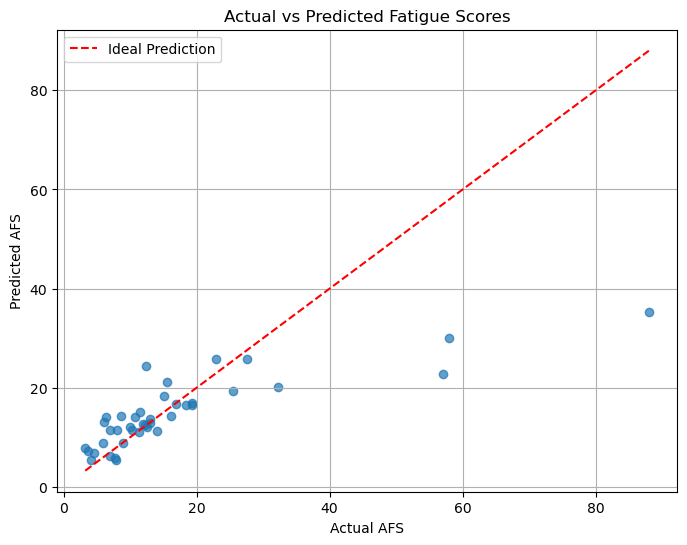

In [33]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label="Ideal Prediction")
plt.xlabel("Actual AFS")
plt.ylabel("Predicted AFS")
plt.title("Actual vs Predicted Fatigue Scores")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Get feature importance from Random Forest
importances = rf_model.feature_importances_

# Show the top features
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(20))  # Show the top 10 most important features


                                              Feature  Importance
5                            Frequency of MFA prompts    0.155091
12          Perceived Importance of Security Warnings    0.124653
8                         Perceived Importance of MFA    0.121322
4                                Perceived Importance    0.083949
11                  Effort Required Security Warnings    0.078501
7                                 Effort Required MFA    0.064685
9                      Frequency of Security Warnings    0.055542
1                       Frequency of Password Changes    0.051738
10                 Difficulty Level Security Warnings    0.044225
3                                     Effort Required    0.034930
6                                Difficulty Level MFA    0.034885
2                                    Difficulty Level    0.031699
15  Which types of MFA do you encounter most often...    0.021317
0   Level of familiarity with cybersecurity practices    0.019438
14  Which 

In [35]:
import joblib
joblib.dump(rf_model, 'fatigue_model.joblib')
print("[RANDOM FOREST] Model saved to fatigue_model.joblib")

[RANDOM FOREST] Model saved to fatigue_model.joblib


---
# Reinforcement Learning Model



In [36]:
pip install stable-baselines3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install "shimmy>=2.0"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install gymnasium stable-baselines3 joblib numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
df.head()

,Level of familiarity with cybersecurity practices,Frequency of Password Changes,Difficulty Level,Effort Required,Perceived Importance,Frequency of MFA prompts,Difficulty Level MFA,Effort Required MFA,Perceived Importance of MFA,Frequency of Security Warnings,...,Which types of MFA do you encounter most often? (Select all that apply)_I do not use MFA,Which types of MFA do you encounter most often? (Select all that apply)_One-time passwords (OTP) via SMS or email,Which types of MFA do you encounter most often? (Select all that apply)_Security key or hardware token,Which types of security warnings do you encounter most often? (Select all that apply)_Antivirus/Malware Notifications,Which types of security warnings do you encounter most often? (Select all that apply)_I do not encounter any warnings/notifications,Which types of security warnings do you encounter most often? (Select all that apply)_Phishing Warnings,Which types of security warnings do you encounter most often? (Select all that apply)_System Update Alerts,Which types of security warnings do you encounter most often? (Select all that apply)_Unauthorized Access Attempts,Average Fatigue Score,Security Score
0,1,3,4,4,5,3,1,1,5,2,...,0,0,1,1,0,1,0,1,6.750000,13
1,1,2,3,2,4,4,3,2,3,5,...,0,0,1,0,1,0,0,0,6.250000,7
2,2,1,2,4,2,2,1,2,2,3,...,0,0,0,0,1,0,0,0,6.000000,5
3,0,5,3,2,4,2,4,2,2,2,...,1,0,0,1,0,0,1,0,6.233333,4
4,2,2,1,4,2,5,2,3,4,3,...,1,0,0,0,0,1,1,1,7.250000,7


In [42]:
pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import os
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
from security_env import SecurityEnv

# Check if tensorboard is installed
try:
    from torch.utils.tensorboard import SummaryWriter
    TENSORBOARD_AVAILABLE = True
except ImportError:
    TENSORBOARD_AVAILABLE = False
    print("Tensorboard is not installed. Training logs will not be saved.")
    print("To install tensorboard, run: pip install tensorboard")

def create_env(render_mode=None):
    """Create and wrap the environment."""
    env = SecurityEnv(render_mode=render_mode)
    env = Monitor(env)
    env = DummyVecEnv([lambda: env])
    env = VecNormalize(env, norm_obs=True, norm_reward=True)
    return env

def train_agent():
    """Train the PPO agent on the SecurityEnv."""
    print("Starting training process...")

    # Create directories for saving models and logs
    os.makedirs("models", exist_ok=True)
    os.makedirs("logs", exist_ok=True)

    # Create training and evaluation environments
    train_env = create_env()
    eval_env = create_env()

    # Create the agent with optimized hyperparameters
    model = PPO(
        "MlpPolicy",
        train_env,
        learning_rate=0.0003,
        n_steps=2048,
        batch_size=64,
        n_epochs=10,
        gamma=0.99,
        gae_lambda=0.95,
        clip_range=0.2,
        clip_range_vf=None,
        ent_coef=0.01,
        vf_coef=0.5,
        max_grad_norm=0.5,
        target_kl=0.01,
        tensorboard_log="./logs/" if TENSORBOARD_AVAILABLE else None,
        policy_kwargs=dict(
            net_arch=dict(
                pi=[64, 64],
                vf=[64, 64]
            )
        ),
        verbose=1
    )

    # Create callbacks
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./models/best_model",
        log_path="./logs",
        eval_freq=1000,
        deterministic=True,
        render=False
    )

    checkpoint_callback = CheckpointCallback(
        save_freq=5000,
        save_path="./models/",
        name_prefix="security_model"
    )

    # Train the agent
    total_timesteps = 500  # Adjust based on your needs
    model.learn(
        total_timesteps=total_timesteps,
        callback=[eval_callback, checkpoint_callback],
        progress_bar=True
    )

    # Save the final model and normalization stats
    model.save("models/final_security_model")
    train_env.save("models/vec_normalize.pkl")

    print("\nTraining completed!")
    return model, train_env

def evaluate_agent(model, env, num_episodes=5):
    """Evaluate the trained agent."""
    print("\nEvaluating agent...")

    for episode in range(num_episodes):
        obs, _ = env.reset()
        done = False
        truncated = False
        total_reward = 0
        episode_steps = 0

        while not (done or truncated):
            action, _ = model.predict(obs, deterministic=True)

            result = env.step(action)
            if len(result) == 4:
                obs, reward, done, info = result
                truncated = False
            else:
                obs, reward, done, truncated, info = result

            if isinstance(reward, np.ndarray):
                reward = reward.item()

            total_reward += reward
            episode_steps += 1

            # Debugging: Check the type of info
            print(f"Type of info: {type(info)}")
            print(f"Info content: {info}")

            # Print step information
            print(f"\nEpisode {episode + 1}, Step {episode_steps}")
            print(f"Action: {action}")
            print(f"Reward: {reward:.2f}")
            print(f"Security Score: {info['security_score']:.2f}")
            print(f"Fatigue Score: {info['fatigue_score']:.2f}")
            print("Feature Values:")
            for name, value in info['feature_values'].items():
                print(f"  {name}: {value}")

        print(f"\nEpisode {episode + 1} completed:")
        print(f"Total Steps: {episode_steps}")
        print(f"Total Reward: {total_reward:.2f}")
        print("-" * 50) 

def plot_training_results(log_dir="./logs"):
    """Plot the training results."""
    import pandas as pd

    # Read the training logs
    df = pd.read_csv(f"{log_dir}/monitor.csv", skiprows=1)

    # Plot episode rewards
    plt.figure(figsize=(12, 5))
    plt.plot(df['r'], label="Episode Reward")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Learning Curve")
    plt.legend()
    plt.savefig("logs/learning_curve.png")
    plt.close()

    # Plot moving average reward
    window_size = 10
    moving_avg = df['r'].rolling(window=window_size).mean()

    plt.figure(figsize=(12, 5))
    plt.plot(moving_avg, label=f"Moving Average Reward (window={window_size})", color='orange')
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title("Moving Average of Episode Rewards")
    plt.legend()
    plt.savefig("logs/moving_average.png")
    plt.close()

def create_eval_env(render_mode=None):
    """Create a raw Gymnasium environment for evaluation."""
    env = SecurityEnv(render_mode=render_mode)
    return env

if __name__ == "__main__":
    # Train the agent
    model, env = train_agent()

    # Evaluate the agent using the raw environment to force Gymnasium API
    eval_env = create_eval_env(render_mode="human")
    evaluate_agent(model, eval_env)

    # Plot training results
    plot_training_results()

Starting training process...
Using cpu device
Logging to ./logs/PPO_6


Output()

Eval num_timesteps=1000, episode_reward=1318.30 +/- 27.39

Episode length: 100.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 100      |
|    mean_reward     | 1.32e+03 |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------


New best mean reward!

Eval num_timesteps=2000, episode_reward=1307.88 +/- 28.30

Episode length: 100.00 +/- 0.00

---------------------------------
| eval/              |          |
|    mean_ep_length  | 100      |
|    mean_reward     | 1.31e+03 |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 1.31e+03 |
| time/              |          |
|    fps             | 33       |
|    iterations      | 1        |
|    time_elapsed    | 60       |
|    total_timesteps | 2048     |
---------------------------------


Early stopping at step 2 due to reaching max kl: 0.02


Training completed!

Evaluating agent...
Type of info: <class 'dict'>
Info content: {'security_score': 38.0, 'fatigue_score': 12.654083333333332, 'step': 1, 'feature_values': {'Level of familiarity with cybersecurity practices': 2.0, 'Frequency of Password Changes': 3.0, 'Difficulty Level': 1.0, 'Effort Required': 4.0, 'Perceived Importance': 3.0, 'Frequency of MFA prompts': 4.0, 'Difficulty Level MFA': 2.0, 'Effort Required MFA': 5.0, 'Perceived Importance of MFA': 5.0, 'Frequency of Security Warnings': 1.0, 'Difficulty Level Security Warnings': 4.0, 'Effort Required Security Warnings': 5.0, 'Perceived Importance of Security Warnings': 4.0, 'Which types of MFA do you encounter most often? (Select all that apply)_Authentication app (e.g., Google Authenticator, Microsoft Authenticator)': 1.0, 'Which types of MFA do you encounter most often? (Select all that apply)_Biometric verification (fingerprint, facial recognition)': 0.0, 'Which types of MFA do you encounter most often? (Select al

FileNotFoundError: [Errno 2] No such file or directory: './logs/monitor.csv'